In [ ]:
# Import the machine learning libraries.
import numpy as np 
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict, cross_validate, ShuffleSplit, RandomizedSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer, fbeta_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.9MB 57kB/s 


In [ ]:
# Load the EMG Hand Gestures dataset.
# The dataset can be downloaded here: https://www.kaggle.com/kyr7plus/emg-4.
rock = pd.read_csv("0.csv", header=None)
scissors = pd.read_csv("1.csv", header=None)
paper = pd.read_csv("2.csv", header=None)
ok = pd.read_csv("3.csv", header=None)

In [ ]:
print(rock.shape, scissors.shape, paper.shape, ok.shape)

(2910, 65) (2903, 65) (2943, 65) (2922, 65)


In [ ]:
df = pd.concat([rock, scissors, paper, ok])
print(df.shape)

(11678, 65)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
2917,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
2918,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
2919,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
2920,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3
2921,-2.0,4.0,2.0,-4.0,12.0,3.0,-2.0,9.0,-8.0,-2.0,-2.0,0.0,-6.0,-20.0,-4.0,3.0,-1.0,1.0,0.0,-4.0,-14.0,2.0,3.0,-6.0,3.0,-6.0,-3.0,1.0,20.0,55.0,-6.0,-6.0,-1.0,-3.0,-2.0,-4.0,11.0,2.0,2.0,7.0,-9.0,0.0,-1.0,-2.0,-14.0,-9.0,-1.0,-2.0,9.0,-1.0,-1.0,4.0,15.0,-39.0,-10.0,2.0,1.0,0.0,-1.0,-2.0,-30.0,64.0,11.0,5.0,3


In [ ]:
# Rename only the last column.
df.columns = [*df.columns[:-1], 'Class']

In [ ]:
# Count up the Class.
df['Class'].value_counts()

2    2943
3    2922
0    2910
1    2903
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions\n (0: Rock | 1: Scissors | 2: Paper | 3: Ok)')

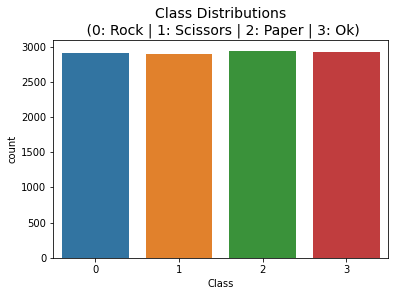

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the class distritution.
sns.countplot(x='Class', data=df)
plt.title('Class Distributions\n (0: Rock | 1: Scissors | 2: Paper | 3: Ok)', fontsize=14)

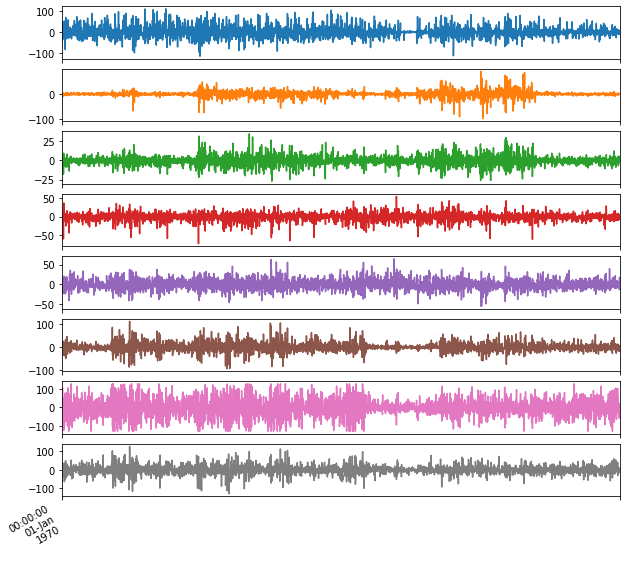

In [ ]:
time_rock=rock.iloc[:,0:8]
time_rock.index=pd.to_datetime(time_rock.index)
time_rock.iloc[:,:].plot(subplots=True, figsize=(10,10), legend=False)
plt.show()

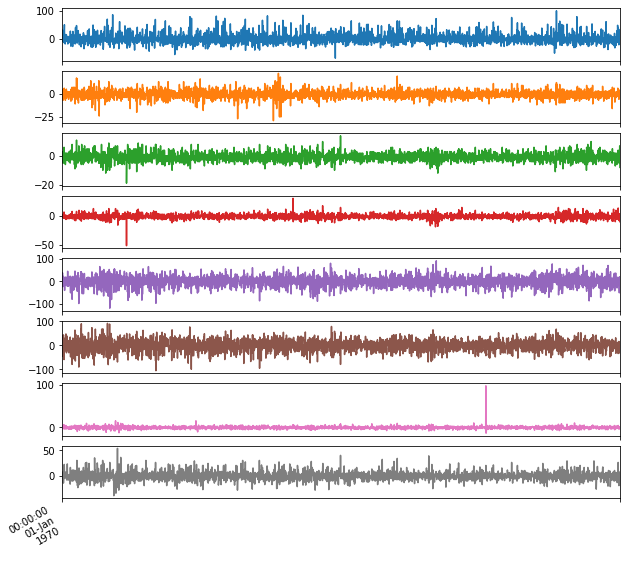

In [ ]:
time_scissors=scissors.iloc[:,0:8]
time_scissors.index=pd.to_datetime(time_scissors.index)
time_scissors.iloc[:,:].plot(subplots=True, figsize=(10,10), legend=False)
plt.show()

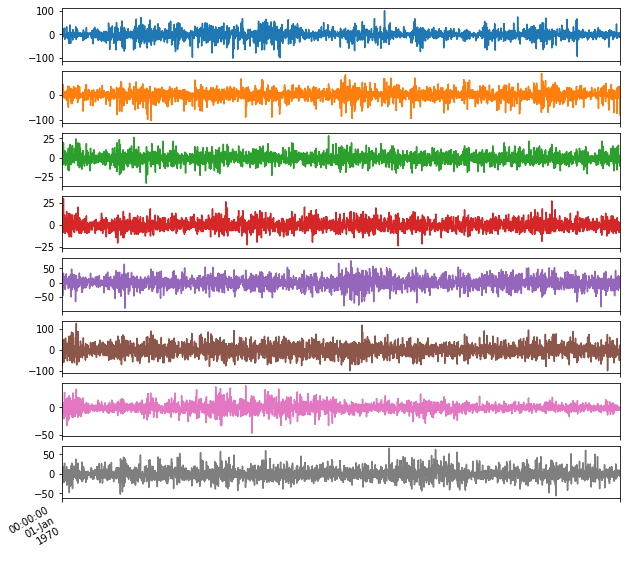

In [ ]:
time_paper=paper.iloc[:,0:8]
time_paper.index=pd.to_datetime(time_paper.index)
time_paper.iloc[:,:].plot(subplots=True, figsize=(10,10), legend=False)
plt.show()

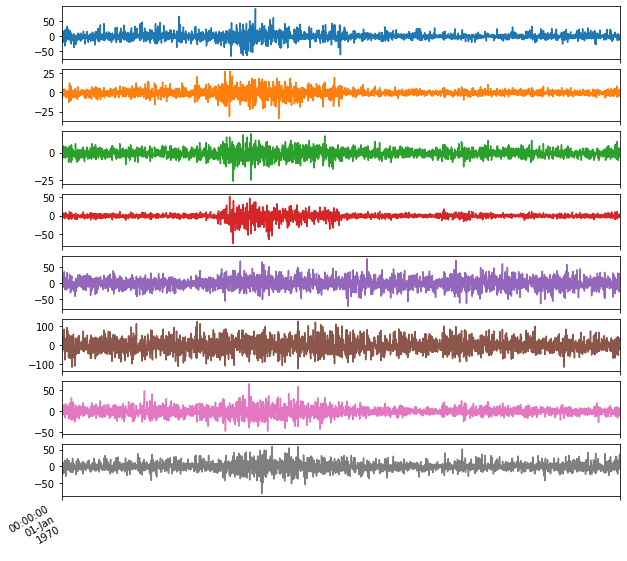

In [ ]:
time_ok=ok.iloc[:,0:8]
time_ok.index=pd.to_datetime(time_ok.index)
time_ok.iloc[:,:].plot(subplots=True, figsize=(10,10), legend=False)
plt.show()

In [ ]:
# Split a dataset into X and y.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
# Separate input features and target.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
# Feature Scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

# Create a list of dictionaries for all classifiers used and its parameters.
classifiers = [

{
    'label': 'Logistic Regression Classifier',
    'model': LogisticRegression(),
    'parameters': {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 1, 10]},
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10   
},
{
    'label': 'Support Vector Classifier',
    'model': SVC(),
    'parameters': {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'linear']},
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10   
},
{
    'label': 'K-Nearest Neighbor',
    'model': KNeighborsClassifier(),
    'parameters':{"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10
},
{
    'label': 'Decision Tree Classifier',
    'model': DecisionTreeClassifier(),
    'parameters': { "criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
                    "min_samples_leaf": list(range(5,7,1)) },
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10  
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(),
    'parameters': { 'learning_rate': [0.01], 'n_estimators':[100,500],
                    'gamma': [0.5, 1, 1.5], 'subsample': [0.6, 0.8, 1.0], 
                    'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [2] },
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10  
},
{
    'label': 'MLP Classifier',
    'model': MLPClassifier(),
    'parameters': { 'hidden_layer_sizes': [(50,50,50), (200,100,50), (100,)],
                    'activation': ['tanh', 'relu'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.05, 0.01],
                    'learning_rate': ['constant','adaptive'] },
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10   
},
{
    'label': 'CatBoost Classifier',
    'model': CatBoostClassifier(),
    'parameters': { 'learning_rate': [0.03, 0.1],
                    'depth': [4, 6, 10],
                    'l2_leaf_reg': [1, 3, 5, 7] },
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10   
}
       
]

In [ ]:
def simple_fit_predict(classifiers, X_train, X_test, y_train, y_test):
    """
    Simple fit-predict to show over-fitting on original data
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    X_train: Training set X values
    X_test: Test set X values
    y_train: Training set y values
    y_test: Test set y_values
    
    Returns:
    
    estimators: Dictionary of model estimator objects    
    """
    average_param = 'macro'
    print('Validation Scores:\n')
    estimators = dict()
    for c in classifiers:
        classifier = c['model']
        label = c['label']
        classifier.fit(X_train, y_train)
        train_predictions = classifier.predict(X_train)
        test_predictions = classifier.predict(X_test)
        estimators[label] = classifier
        
        print(label, 'scores')
        print('=' *60)
        print('Precision:')
        print('Training score: ',round(precision_score(train_predictions,y_train,average=average_param)*100,2),'%', '\t Testing score: ',  round(precision_score(test_predictions,y_test,average=average_param)*100,2),'%')
        print('Recall:')
        print('Training score: ',round(recall_score(train_predictions,y_train,average=average_param)*100,2),'%', '\t Testing score: ',  round(recall_score(test_predictions,y_test,average=average_param)*100,2),'%')
        print('F1 Score:')
        print('Training score: ',round(f1_score(train_predictions,y_train,average=average_param)*100,2),'%', '\t Testing score: ',  round(f1_score(test_predictions,y_test,average=average_param)*100,2),'%')
        print('Accuracy:')
        print('Training score: ',round(accuracy_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(accuracy_score(test_predictions,y_test)*100,2),'%')
        print('=' *60)
        print('\n')
    return estimators

In [ ]:
initial_estimator = simple_fit_predict(classifiers, X_train, X_test, y_train, y_test)

Validation Scores:

Logistic Regression Classifier scores
Precision:
Training score:  38.18 % 	 Testing score:  34.87 %
Recall:
Training score:  38.71 % 	 Testing score:  35.31 %
F1 Score:
Training score:  38.39 % 	 Testing score:  35.06 %
Accuracy:
Training score:  38.17 % 	 Testing score:  34.85 %


Support Vector Classifier scores
Precision:
Training score:  95.35 % 	 Testing score:  88.62 %
Recall:
Training score:  95.52 % 	 Testing score:  88.74 %
F1 Score:
Training score:  95.36 % 	 Testing score:  88.51 %
Accuracy:
Training score:  95.34 % 	 Testing score:  88.57 %


K-Nearest Neighbor scores
Precision:
Training score:  76.09 % 	 Testing score:  66.21 %
Recall:
Training score:  80.74 % 	 Testing score:  72.74 %
F1 Score:
Training score:  75.28 % 	 Testing score:  64.26 %
Accuracy:
Training score:  76.02 % 	 Testing score:  66.01 %


Decision Tree Classifier scores
Precision:
Training score:  100.0 % 	 Testing score:  78.17 %
Recall:
Training score:  100.0 % 	 Testing score:  78.

In [ ]:
def best_estimator(classifiers, X_train, y_train):
    """
    Function that uses Randomized Search CV or GridSearch to fine tune hyper parameters
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    X_train: Training set X values
    y_train: Training set y values
         
    Returns:
    
    best_estimators: Dictionary of model estimator objects with best tuned hyper parameters
    """
    
    fbeta = make_scorer(fbeta_score, beta=0.5)
    
    scoring = {'prec_macro': 'precision_macro',
               'rec_micro': 'recall_micro',
               'acc': 'accuracy',
               #'AUC': 'roc_auc',
               #'fbeta_score': fbeta
               }
    best_estimators = dict()
    best_scores = dict()
    
    for c in classifiers:
            classifier = c['model']
            label = c['label']
            print('%s Best Values' % (c['label']))
            grid_search = GridSearchCV(estimator=classifier,
                       param_grid=c['parameters'],
                       scoring=scoring,
                       refit='prec_macro',
                       cv=c['g_cv'],
                       return_train_score=True,
                       verbose=1)

            grid_search.fit(X_train, y_train)
            results = grid_search.cv_results_
            print('\n')
            print('Best Precision Score: ',round(grid_search.best_score_*100,2), '%')
            print('Parameters: ',grid_search.best_params_)

            best_estimators[label] = grid_search.best_estimator_
            best_scores[label] = round(grid_search.best_score_*100, 2)
            print('%s Optimized scores', label)
            print('=' *60)
            print('\n')
            for key,scorer in scoring.items():
                print('{} scores:\n '.format(scorer))
                #print(results.keys())
                for sample in ('train','test'):
                    sample_score_mean = round(results['mean_%s_%s' % (sample, key)].mean()*100, 2)
                    sample_score_std = round(results['std_%s_%s' % (sample, key)].mean()*100, 2)
                    if(sample == 'train'):
                        to_print = 'Training'
                    else:
                        to_print = 'Validation'
                    print(to_print,' ',scorer,' : ',sample_score_mean, '% (+/-)', sample_score_std, '%')
                print('\n')

            print('=' *60)
                    
    print('Comparing the best score between Classifiers\n')
    print('\t'.join(['{0}: {1} % \n'.format(k, v) for k,v in best_scores.items()]))
    return best_estimators

In [ ]:
# Create a list of dictionaries for all classifiers used and its parameters.
# Removed CatBoost classifier to save the training time.
classifiers2 = [

{
    'label': 'Logistic Regression Classifier',
    'model': LogisticRegression(),
    'parameters': {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 1, 10]},
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10   
},
{
    'label': 'Support Vector Classifier',
    'model': SVC(),
    'parameters': {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'linear']},
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10   
},
{
    'label': 'K-Nearest Neighbor',
    'model': KNeighborsClassifier(),
    'parameters':{"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10
},
{
    'label': 'Decision Tree Classifier',
    'model': DecisionTreeClassifier(),
    'parameters': { "criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
                    "min_samples_leaf": list(range(5,7,1)) },
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10  
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(),
    'parameters': { 'learning_rate': [0.01], 'n_estimators':[100,500],
                    'gamma': [0.5, 1, 1.5], 'subsample': [0.6, 0.8, 1.0], 
                    'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [2] },
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10  
},
{
    'label': 'MLP Classifier',
    'model': MLPClassifier(),
    'parameters': { 'hidden_layer_sizes': [(50,50,50), (200,100,50), (100,), (300,)],
                    'activation': ['identify', 'logistic', 'tanh', 'relu'],
                    'solver': ['lbfgs', 'sgd', 'adam'],
                    'alpha': [0.0001, 0.05, 0.01],
                    'learning_rate': ['constant', 'invscaling', 'adaptive'] },
    'r_cv': 3,
    'g_cv': 5,
    'n_iter': 10   
},
       
]

In [ ]:
# Find the best hyper parameters using GridSearchCV method.
best_estimators = best_estimator(classifiers2, X_train, y_train)

Logistic Regression Classifier Best Values
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.3s finished




Best Precision Score:  35.4 %
Parameters:  {'C': 10, 'penalty': 'l2'}
%s Optimized scores Logistic Regression Classifier


precision_macro scores:
 
Training   precision_macro  :  nan % (+/-) nan %
Validation   precision_macro  :  nan % (+/-) nan %


recall_micro scores:
 
Training   recall_micro  :  nan % (+/-) nan %
Validation   recall_micro  :  nan % (+/-) nan %


accuracy scores:
 
Training   accuracy  :  nan % (+/-) nan %
Validation   accuracy  :  nan % (+/-) nan %


Support Vector Classifier Best Values
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 12.3min finished




Best Precision Score:  89.56 %
Parameters:  {'C': 1, 'kernel': 'rbf'}
%s Optimized scores Support Vector Classifier


precision_macro scores:
 
Training   precision_macro  :  70.43 % (+/-) 0.4 %
Validation   precision_macro  :  65.72 % (+/-) 0.98 %


recall_micro scores:
 
Training   recall_micro  :  66.55 % (+/-) 0.3 %
Validation   recall_micro  :  61.9 % (+/-) 0.92 %


accuracy scores:
 
Training   accuracy  :  66.55 % (+/-) 0.3 %
Validation   accuracy  :  61.9 % (+/-) 0.92 %


K-Nearest Neighbor Best Values
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  72.29 %
Parameters:  {'algorithm': 'auto', 'n_neighbors': 4}
%s Optimized scores K-Nearest Neighbor


precision_macro scores:
 
Training   precision_macro  :  84.44 % (+/-) 0.24 %
Validation   precision_macro  :  71.59 % (+/-) 0.9 %


recall_micro scores:
 
Training   recall_micro  :  80.57 % (+/-) 0.34 %
Validation   recall_micro  :  65.13 % (+/-) 0.82 %


accuracy scores:
 
Training   accuracy  :  80.57 % (+/-) 0.34 %
Validation   accuracy  :  65.13 % (+/-) 0.82 %


Decision Tree Classifier Best Values
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  62.3 %
Parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
%s Optimized scores Decision Tree Classifier


precision_macro scores:
 
Training   precision_macro  :  47.07 % (+/-) 4.38 %
Validation   precision_macro  :  44.82 % (+/-) 4.82 %


recall_micro scores:
 
Training   recall_micro  :  45.62 % (+/-) 0.83 %
Validation   recall_micro  :  45.04 % (+/-) 0.99 %


accuracy scores:
 
Training   accuracy  :  45.62 % (+/-) 0.83 %
Validation   accuracy  :  45.04 % (+/-) 0.99 %


XGBoost Classifier Best Values
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 48.4min finished




Best Precision Score:  89.48 %
Parameters:  {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.6}
%s Optimized scores XGBoost Classifier


precision_macro scores:
 
Training   precision_macro  :  88.23 % (+/-) 0.36 %
Validation   precision_macro  :  86.96 % (+/-) 0.75 %


recall_micro scores:
 
Training   recall_micro  :  87.61 % (+/-) 0.38 %
Validation   recall_micro  :  86.31 % (+/-) 0.76 %


accuracy scores:
 
Training   accuracy  :  87.61 % (+/-) 0.38 %
Validation   accuracy  :  86.31 % (+/-) 0.76 %


MLP Classifier Best Values
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed: 408.4min finished




Best Precision Score:  94.15 %
Parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (300,), 'learning_rate': 'adaptive', 'solver': 'adam'}
%s Optimized scores MLP Classifier


precision_macro scores:
 
Training   precision_macro  :  nan % (+/-) nan %
Validation   precision_macro  :  nan % (+/-) nan %


recall_micro scores:
 
Training   recall_micro  :  nan % (+/-) nan %
Validation   recall_micro  :  nan % (+/-) nan %


accuracy scores:
 
Training   accuracy  :  nan % (+/-) nan %
Validation   accuracy  :  nan % (+/-) nan %


Comparing the best score between Classifiers

Logistic Regression Classifier: 35.4 % 
	Support Vector Classifier: 89.56 % 
	K-Nearest Neighbor: 72.29 % 
	Decision Tree Classifier: 62.3 % 
	XGBoost Classifier: 89.48 % 
	MLP Classifier: 94.15 % 

